In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

In [62]:
tokyo = pd.read_csv("C:/Users/gujju/Dropbox/eScience-MachineLearning/Jugal/Tokyo-Cruise-DataSet/tokyo.csv")
tokyo.head()

,﻿date,X01fsc,Y01chl,Z01pe,timeindex
0,11.0,0.04,-0.52,-0.16,0.0
1,11.0,-0.89,-0.31,0.13,0.0
2,11.0,-0.55,-0.13,-0.24,0.0
3,11.0,1.16,-0.19,-1.13,0.0
4,11.0,-0.87,-0.74,0.11,0.0


In [63]:
kmeans = KMeans(n_clusters=3)

In [64]:
'''
tokyo.drop(tokyo.columns[[0, 4]], axis=1, inplace=True)
kmeans = kmeans.fit(tokyo)
print(kmeans.cluster_centers_)
centers = open('C:/Users/gujju/Dropbox/eScience-MachineLearning/Jugal/Tokyo-Cruise-DataSet/IPython-Notebook-Work/Center.csv', 'w')
centers.write('x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3')
centers.write('\n')
centers_list = kmeans.cluster_centers_.tolist()
for row in centers_list:
    for column in row:
        centers.write('%f,' % column)
        
        
centers.flush()
centers.close()
'''

"\ntokyo.drop(tokyo.columns[[0, 4]], axis=1, inplace=True)\nkmeans = kmeans.fit(tokyo)\nprint(kmeans.cluster_centers_)\ncenters = open('C:/Users/gujju/Dropbox/eScience-MachineLearning/Jugal/Tokyo-Cruise-DataSet/IPython-Notebook-Work/Center.csv', 'w')\ncenters.write('x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3')\ncenters.write('\n')\ncenters_list = kmeans.cluster_centers_.tolist()\nfor row in centers_list:\n    for column in row:\n        centers.write('%f,' % column)\n        \n        \ncenters.flush()\ncenters.close()\n"

In [65]:
all_center_df = pd.read_csv("C:/Users/gujju/Dropbox/eScience-MachineLearning/Jugal/Tokyo-Cruise-DataSet/IPython-Notebook-Work/Center.csv", index_col= False)
red_center = np.array([all_center_df.x_1, all_center_df.y_1, all_center_df.z_1])
blue_center = np.array([all_center_df.x_2, all_center_df.y_2, all_center_df.z_2])
green_center = np.array([all_center_df.x_3, all_center_df.y_3, all_center_df.z_3])

In [66]:
centers_df = pd.read_csv("C:/Users/gujju/Dropbox/eScience-MachineLearning/Jugal/Tokyo-Cruise-DataSet/IPython-Notebook-Work/Cluster_Centers.csv", index_col= False)
print(centers_df.shape)

(88, 9)


In [67]:
cluster_colors = open('C:/Users/gujju/Dropbox/eScience-MachineLearning/Jugal/Tokyo-Cruise-DataSet/IPython-Notebook-Work/ClusterWithColors.csv', 'w')
cluster_colors.write('fsc,chl,pe,color,time')
cluster_colors.write('\n')

1

In [68]:
def colormycluster(cluster_vector):
    dis1 = np.linalg.norm(red_center - cluster_vector)
    dis2 = np.linalg.norm(blue_center - cluster_vector)
    dis3 = np.linalg.norm(green_center - cluster_vector)
    temp = np.array([dis1, dis2, dis3])
    min_dis = temp.min()
    if(min_dis == dis1):
        return 'red'
    elif(min_dis == dis2):
        return 'blue'
    else:
        return 'green'

In [69]:
for i in range(len(centers_df.x_1)):
    c1 = np.array([centers_df.x_1.loc[i], centers_df.y_1.loc[i], centers_df.z_1.loc[i]])
    c2 = np.array([centers_df.x_2.loc[i], centers_df.y_2.loc[i], centers_df.z_2.loc[i]])
    c3 = np.array([centers_df.x_3.loc[i], centers_df.y_3.loc[i], centers_df.z_3.loc[i]])
    cluster_colors.write('%f,' % centers_df.x_1.loc[i])
    cluster_colors.write('%f,' % centers_df.y_1.loc[i])
    cluster_colors.write('%f,' % centers_df.z_1.loc[i])
    cluster_colors.write('%s,' % colormycluster(c1))
    cluster_colors.write('%d,' % i)
    cluster_colors.write('\n')
    cluster_colors.write('%f,' % centers_df.x_2.loc[i])
    cluster_colors.write('%f,' % centers_df.y_2.loc[i])
    cluster_colors.write('%f,' % centers_df.z_2.loc[i])
    cluster_colors.write('%s,' % colormycluster(c2))
    cluster_colors.write('%d,' % i)
    cluster_colors.write('\n')
    cluster_colors.write('%f,' % centers_df.x_3.loc[i])
    cluster_colors.write('%f,' % centers_df.y_3.loc[i])
    cluster_colors.write('%f,' % centers_df.z_3.loc[i])
    cluster_colors.write('%s,' % colormycluster(c3))
    cluster_colors.write('%d,' % i)
    cluster_colors.write('\n')
    

cluster_colors.flush()
cluster_colors.close()

In [5]:
colors_df = pd.read_csv("C:/Users/gujju/Dropbox/eScience-MachineLearning/Jugal/Tokyo-Cruise-DataSet/IPython-Notebook-Work/ClusterWithColors.csv", index_col= False)


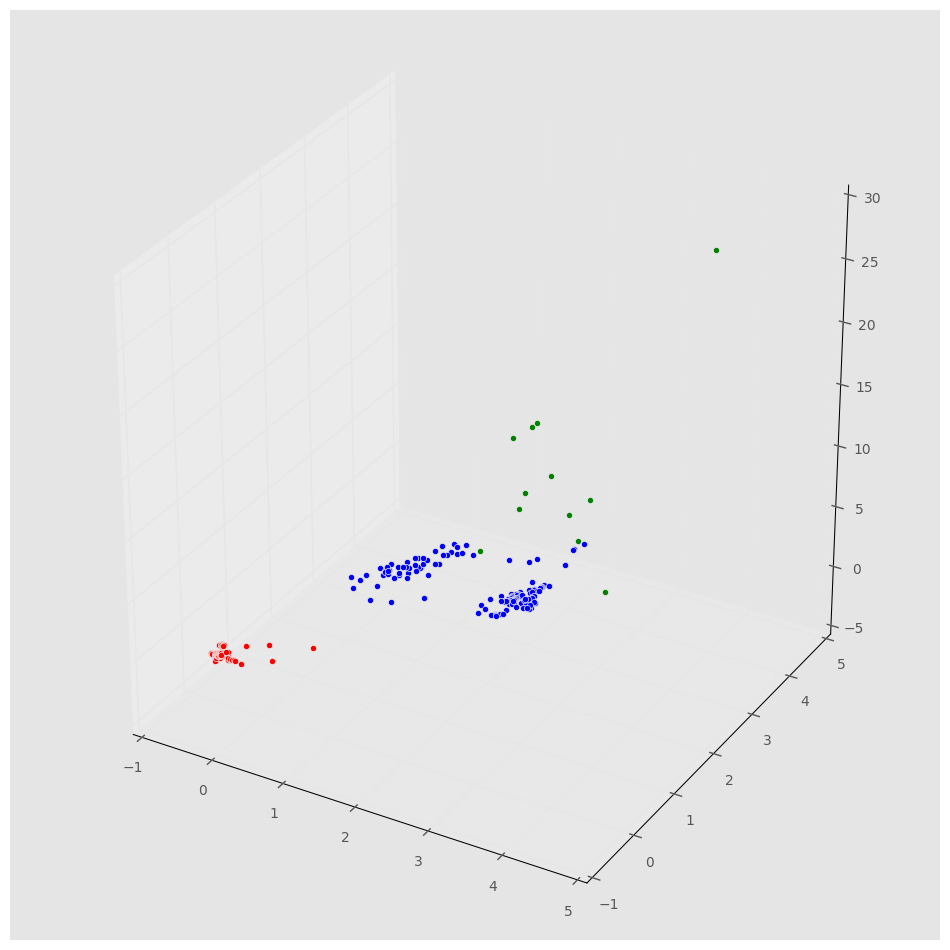

In [7]:
fig = figure(figsize=(12, 12), dpi=100)
ax = fig.gca(projection='3d')
for i in range(len(colors_df.fsc)):
    ax.scatter(colors_df.fsc.loc[i], colors_df.chl.loc[i], colors_df.pe.loc[i], c=colors_df.color.loc[i])
    

plt.show()